In [25]:
import folium
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

In [15]:
api_key = "827b87fe75f57e3a7f7321ff6fdefa9e"  # Replace with your OpenWeatherMap API key
city = "Mexico City"
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
response = requests.get(url)
data = response.json()

In [16]:
latitude = data["coord"]["lat"]
longitude = data["coord"]["lon"]

In [18]:
map_center = [latitude, longitude]
map_zoom = 10
m = folium.Map(location=map_center, zoom_start=map_zoom)

In [20]:
weather_description = data["weather"][0]["description"]
folium.Marker(
    location=map_center,
    popup=f"{city}<br>Weather: {weather_description}",
    icon=folium.Icon(color="blue", icon="cloud"),
).add_to(m)
m

In [23]:

import folium
import requests
import geocoder

# Get user input for the location
location = input("Enter a location: ")

# Geocode the location to get latitude and longitude
g = geocoder.arcgis(location)
latitude, longitude = g.latlng

# Create a folium map centered at the specified location
m = folium.Map(location=[latitude, longitude], zoom_start=10)

# Make a request to the weather API to get current weather data
url = f"http://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid=827b87fe75f57e3a7f7321ff6fdefa9e"
response = requests.get(url)
data = response.json()

# Extract the weather information
city = data["name"]
weather_description = data["weather"][0]["description"]

# Create a marker for the specified location
folium.Marker(
    location=[latitude, longitude],
    popup=f"{city}<br>Weather: {weather_description}",
    icon=folium.Icon(color="blue", icon="cloud"),
).add_to(m)

# Display the map
m


Enter a location: Benito Juárez, CDMX, Mexico


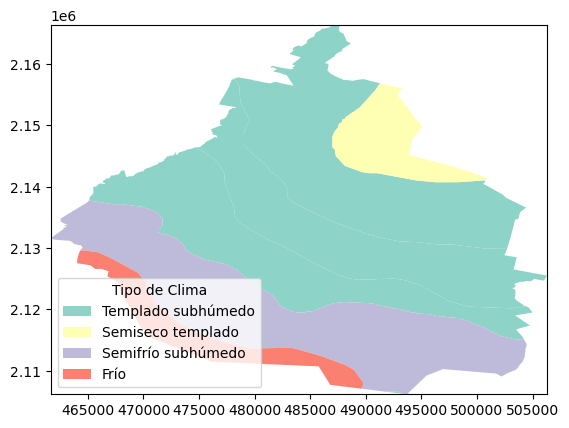

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile into a GeoDataFrame, specifying the encoding
gdf = gpd.read_file('./climasCDMX/climas.shp', encoding='utf-8')

# Specify the column containing the categories/groups, using the correct column name with tildes
category_column = 'TIPO_C'

# Get unique categories/groups
categories = gdf[category_column].unique()

# Create a list of colors for the categories
colors = plt.cm.Set3(range(len(categories)))

# Plot the polygons with different colors based on the category column
fig, ax = plt.subplots()
for idx, row in gdf.iterrows():
    if row.geometry.is_empty:
        continue
    category = row[category_column]
    color = colors[np.where(categories == category)[0][0]]
    if row.geometry.geom_type == 'Polygon':
        polygon = row.geometry
        ax.add_patch(plt.Polygon(polygon.exterior.coords, facecolor=color))
    elif row.geometry.geom_type == 'MultiPolygon':
        for poly in row.geometry.geoms:
            ax.add_patch(plt.Polygon(poly.exterior.coords, facecolor=color))

# Create custom legend handles and labels
legend_handles = [Patch(facecolor=color) for color in colors]
legend_labels = categories

# Add the legend with custom handles and labels
plt.legend(legend_handles, legend_labels, title="Tipo de Clima")

# Set axis limits
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Display the plot
plt.show()


In [20]:
print(gdf.head())


   OBJECTID          AREA  PERIMETER        CLAVE              TIPO_C   
0         1  5.465438e+09  1276501.0     C(w0)(w)  Templado subhúmedo  \
1         2  1.823652e+10  3058081.0     C(w1)(w)  Templado subhúmedo   
2         3  2.391977e+09   263349.7        BS1kw   Semiseco templado   
3         4  1.574925e+10  2223195.0     C(w2)(w)  Templado subhúmedo   
4         5  1.145764e+09   311587.1  C(E)(w2)(w)  Semifrío subhúmedo   

                                            geometry  
0  POLYGON ((491275.838 2156872.508, 490857.117 2...  
1  POLYGON ((502694.581 2129867.173, 502635.804 2...  
2  POLYGON ((500772.345 2141051.467, 498377.974 2...  
3  MULTIPOLYGON (((493160.911 2106371.065, 493161...  
4  POLYGON ((504216.679 2115147.982, 504254.904 2...  


/var/folders/tt/lyy7kfd94q35yvp419ksxn7c0000gn/T/ipykernel_66235/2609161787.py:21: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if row.geometry.type == 'Polygon':
/var/folders/tt/lyy7kfd94q35yvp419ksxn7c0000gn/T/ipykernel_66235/2609161787.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif row.geometry.type == 'MultiPolygon':


TypeError: 'MultiPolygon' object is not iterable

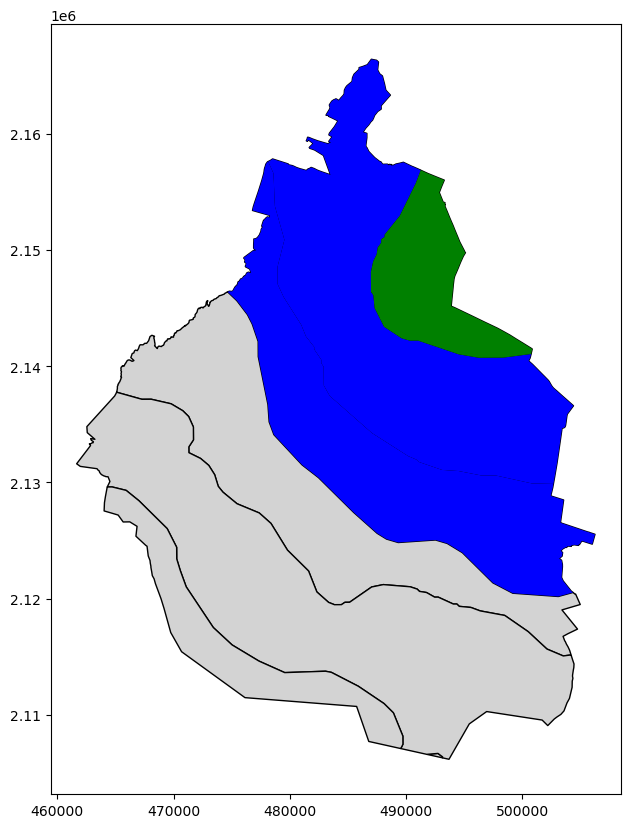

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the shapefile
shapefile_path = './climasCDMX/climas.shp'
gdf = gpd.read_file(shapefile_path,encoding='utf-8')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the map
gdf.plot(ax=ax, facecolor='lightgray', edgecolor='black')

# Define the categories and colors
categories = ['Templado subhúmedo', 'Semiseco templado', 'Semifrío subhúmedo']
colors = ['blue', 'green', 'red']

# Iterate over the rows of the GeoDataFrame
for _, row in gdf.iterrows():
    if row.geometry.type == 'Polygon':
        poly = row.geometry
        category = row['TIPO_C']
        color = colors[categories.index(category)]
        ax.add_patch(plt.Polygon(poly.exterior.coords, facecolor=color))
    elif row.geometry.type == 'MultiPolygon':
        for poly in row.geometry:
            category = row['TIPO_C']
            color = colors[categories.index(category)]
            ax.add_patch(plt.Polygon(poly.exterior.coords, facecolor=color))

# Create custom legend handles and labels
legend_handles = [Patch(facecolor=color) for color in colors]
legend_labels = categories

# Add the legend to the right, outside the map
legend = ax.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Set the title of the legend
legend.set_title('Climate Types')

# Show the plot
plt.show()
